# Homework 12: Due Wednesday, April 30 at 11:59 PM

---

## <a name="HW1Inst">Instructions:</a>
---

1. <font color="tomato">Either click the COPY TO DRIVE button or use the menu File/Save/Save a Copy to save your own version of the notebook in your own folder in Google Drive.</font>

  - If you do not have a Google account, you will need to create a Google account in order to create your own individual copy of this notebook.
  - By default, the notebook will be saved in a folder named **Colab Notebooks** in your drive.
  - Feel free to name and store the notebook wherever you like!

2. <font color="mediumseagreen">After you have copied the notebook into your Drive, you can begin editing and saving your work.</font>

**Upload your completed assignment into Canvas as a Google Colab (or Jupyter) Notebook with file extension `.ipynb`.**

Upload your file into the Homework 12 assignment in Canvas before <font color="dodgerblue">**11:59PM on Wednesday, April 30.**</font>

**You must provide supporting work for your all of your answers.**

  - <font color="dodgerblue">That work will include using R code cells.</font>
    - **Feel free to insert as much R code as you like.**
    - You must interpret or explain how the output of a code cell is being utilized to solve the problem.
    - **Code with incomplete or missing explanations of why the output is useful may not receive full credit.**
  - <font color="dodgerblue">Your work will also involve writing explanations and justifications in text cells.</font>
    - **Be sure to type/write out the steps of your work/explanation so I can see how you arrived at your answer.**


## Important Academic Policies:
---

- **Be your own work.** Though you may collaborate with others, everyone is responsible for writing up the work in their own way using their own methods. Plagiarism of any form is not tolerated.
- **Be complete.** You must provide all work and/or explanations needed to find the solution. Answers with insufficient or incomplete supporting work may lose credit.
- **Adhere to the Code of Academic Honesty.**
- **Be clearly written (and legible if written).** Your solution to a problem must be clear, written in complete sentences. You may lose credit for work that is unclear or hard to follow.

## <font color="dodgerblue">Let me know if you need help, and **GOOD LUCK!!!**</font>

----

# <a name="load-pack">Loading Required Packages</a>

---

In [1]:
install.packages("Stat2Data")
library(Stat2Data)  # load package for Hawks data

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# <a name="load-hawk">Loading the `Hawks` Data</a>

---

The `Hawks` data set in the `Stat2Data` package includes measurements for 3 different hawk species. The `Hawks` data frame has 908 observations on 19 variables. Some of the variables we will consider are:

- `Species`: `CH` = Cooper's, `RT` = Red-tailed, `SS` = Sharp-Shinned.
- `Age`: 	`A` = Adult or `I` = Immature.
- `Sex`:	`F` = Female or `M` = Male.
- `Wing`:	Length (in mm) of primary wing feather from tip to wrist it attaches to.
- `Weight`:	Body weight (in g).
- `Culmen`:	Length (in mm) of the upper bill from the tip to where it bumps into the fleshy part of the bird.

More information about the data may be found by running `?Stat2Data::Hawks` in a code cell. Run the code cell below to convert the `Hawks` data to a suitable format.


In [2]:
# run the code cell as is to reformat Hawks
data(Hawks, package = "Stat2Data")  # load Hawks data
Hawks <- Hawks[c("Species", "Age", "Sex", "Wing", "Weight", "Culmen")]  # select variables
Hawks$Sex[Hawks$Sex == ""] <- NA  # code missing values with NA
Hawks$Sex <- factor(Hawks$Sex)  # convert Sex to a factor
summary(Hawks)

 Species  Age       Sex           Wing           Weight           Culmen    
 CH: 70   A:224   F   :174   Min.   : 37.2   Min.   :  56.0   Min.   : 8.6  
 RT:577   I:684   M   :158   1st Qu.:202.0   1st Qu.: 185.0   1st Qu.:12.8  
 SS:261           NA's:576   Median :370.0   Median : 970.0   Median :25.5  
                             Mean   :315.6   Mean   : 772.1   Mean   :21.8  
                             3rd Qu.:390.0   3rd Qu.:1120.0   3rd Qu.:27.3  
                             Max.   :480.0   Max.   :2030.0   Max.   :39.2  
                             NA's   :1       NA's   :10       NA's   :7     

# <a name="missing-values">An Important Note About Missing Values</a>

---

The `Hawks` data has some missing values. Do NOT remove these observations at any stage of your work from `Hawks` as a method for ignoring `NA` values when performing computations.

- Instead, you likely can pass an argument into the command instructing R to ignore `NA` values during the computation(s).
- Other methods may be possible, but be sure not to remove any observations that can be included and do not overwrite `Hawks` at any stage.


# <a name="missing-values">An Important Note About Using the Indicated Function</a>

---

Many questions in this assignment ask you to perform an action using a specific function. When instructed, you MUST use the indicated function(s) to perform those actions. Answers obtained using another function or method will not earn any credit.

- For example, if a questions asks you to use the `apply` function, you will not earn any credit for using `lapply` to perform that action.

- When no method or function is specifically indicated, you may choose any methods **that have been covered this semester** to answer the question.


# <a name="Q1">Question 1</a>

---

Use the `apply` function to compute the sample standard deviation of the `Wing`, `Weight`, and `Culmen` columns of `Hawks`.



In [11]:
# solution to question

# Use apply on Hawks data that I subset only the Wing, Weight, and Culmen columns.
# Specify the margin as 2 so it calculates column-wise, and apply sd function to all elements, and ignore the NA values using na.rm = TRUE.
apply(Hawks[, c("Wing", "Weight", "Culmen")], 2, sd, na.rm = TRUE)

Wing     Weight     Culmen 
 95.277591 462.311760   7.284175

# <a name="Q2">Question 2</a>

---

Use the `apply` function to determine the count of each level for the `Species`, `Age`, and `Sex` columns of `Hawks`.


In [12]:
# solution to question

# Use apply on Hawks data that I subset only the Species, Age, and Sex columns.
# Specify the margin as 2 so it calculates column-wise and apply function(x) where it takes the x values (which is the Hawks data that I subsetted)
# and put it in the table(x) function where x is the Hawk data that I subsetted. And this function will return the result from using the table() function.
# It will return the count of each level for each columns.
apply(Hawks[, c("Species", "Age", "Sex")], 2, FUN = function(x)
{
  counts <- table(x)  # Used to count the frequency or values in a vector and by default this function will ignore the NA values.

  return(counts)
})

$Species
x
 CH  RT  SS 
 70 577 261 

$Age
x
  A   I 
224 684 

$Sex
x
  F   M 
174 158 


# <a name="Q3">Question 3</a>

---

In this question we will create a function called `lower_range` that calculates the distance from the median value to the minimum value of a numeric vector:

$$\text{lower_range} = \text{median} - \text{minimum}.$$

Create a function named `lower_range` to compute the distance from the median value to the minimum value of a numeric vector. The function should include two arguments as inputs:

- `x`: a numeric vector.
- `na.rm`: `TRUE` removes missing values. `FALSE` does not removed missing values.

Then, in a separate code cell, use `lower_range` to compute the distance from the median value to the minimum value of the `Weight` variable removing `NA`s.


In [13]:
# solution to question

# Create a function called lower_range that takes in 2 values; a numeric vector x, and a boolean value to decide if you want to remove the NA values or not.
lower_range <- function(x, bool)
{
  median_x <- median(x, na.rm = bool)  # Find the median of numeric vector x, and configure the na.rm (NA removing argument) as the bool variable (The boolean user input) and store it in median_x.

  min_x <- min(x, na.rm = bool)  # Find the min of numeric vector x and na.rm will be implemented or not depending on user input and store it in min_x.

  result <- median_x - min_x  # Calculate the distance which is median - minimum and store it in result.

  return(result)  # Return result.

}

In [14]:
# compute lower_range of Weight

# Calculate the Hawks$Weight distance using the lower_range function we just defined, and pass in TRUE for the na.rm argument.
lower_range(Hawks$Weight, TRUE)

[1] 914

# <a name="Q4">Question 4</a>

---

Use the `tapply` function to determine the `lower_range` of the `Wing` measurements for each level of `Species`. Be sure to take into account missing values.


In [18]:
# solution to question

# Use tapply to apply the function to each level of species in the Wing column of Hawks' data set, and pass in na.rm = TRUE to remove the missing values. (TRUE is for the second argument in the lower_range function)
tapply(Hawks$Wing, Hawks$Species, FUN = lower_range, TRUE)

CH    RT    SS 
 95.0 346.8  48.0

# <a name="Q5">Question 5</a>

---

A <font color="dodgerblue">**sampling distribution**</font> is the distribution of the statistics we get when we repeatedly compute a statistic for independent random samples taken from a population.

Use the `lapply` function to draw 10,000 *independent, identically distributed (or i.d.d)* samples each of size `10` from a normal distribution with mean 2 and standard deviation 3. We can draw a single sample using the `rnorm` function. Assign the result the name `samples`. **Do not print the samples**.

Then, use the `sapply` function to determine the sample mean of each sample of data in `samples`. Assign the result the name `samp_means`. **Do not print the sample mean of each sample of data**.

Finally, in a separate code cell, compute the mean and standard error of the values stored in sampling distribution `samp_means` **and print only these two numbers.** Recall the standard error is the standard deviation of the sampling distribution.

In [19]:
?rnorm  # Check how rnorm works.

In [31]:
# create samples and compute vector samp_means

# Use lapply and pass in the vector from 1 to 10000, and use function to iterate over the vector and apply the function 10000 times.
# Since the function takes in x, but inside the function never uses x, this function return value will be the first element of the vector, and this will continue until it reaches 10000.
# And store it in samples.
samples <- lapply(1:10000, FUN = function(x)
{
  rnormsamp <- rnorm(10, 2, 3)  # Use rnorm(number of samples, mean, standard deviation) to draw 1 sample that has size of 10 and store it in rnormsamp.

  return (rnormsamp)  # Return rnormsamp.
})


In [32]:
# compute mean and standard error of sampling distribution

# Use sapply to iterate over the samples list and apply mean to every element in the list and store it in samp_means. (The result would probably be vector because it's the simplest form)
samp_means <- sapply(samples, FUN = mean)

In [33]:
# Print out the mean and the standard error of samp_means to check the values.
message("The mean of samp_means is ", mean(samp_means), ".")
message("The standard error of samp_means is ", sd(samp_means), ".")

The mean of samp_means is 2.01525564116699.

The standard error of samp_means is 0.944236037789045.



# <a name="Q6">Question 6</a>

---

What was the advantage of using `sapply` in the previous question to compute the values stored in means instead of the `lapply` function? Type your answer in the text cell below using complete sentences.


## <a name="sol">Solution to Question 6</a>

---
The advantage of using sapply in the previous question to compute the mean of each element that are stored in samples instead of using lapply is the returning value. If we used lapply, it will return a list of values and it may make unnecessary complications. For example, if you wanted to calculate the mean of a list, you would have to unlist it before calculating the mean. But since we are using sapply, it will most likely return a vector because it is the simplest form for this answer. Therefore, we can use our functions like mean or sd directly without unlisting.



<br>  
<br>  


# <a name="Q7">Question 7</a>

---

Recall from a previous statistics course that if we have a population which has the distribution $X \sim N(\mu, \sigma)$, then we can use the <font color="dodgerblue">**Central Limit Theorem**</font> (or CLT) to conclude the sampling distribution for the mean when samples size $n$ are repeatedly picked at random will have the distribution

$$\bar{X} \sim N \big( \mu_{\bar{X}} , SE(\bar{X}) \big) = N \left( \mu , \frac{\sigma}{\sqrt{n}} \right).$$

- The mean of the sampling distribution for $\bar{X}$ is equal to the population mean, $\mu_{\bar{X}} = \mu$.
- The standard deviation of the sampling distribution is called the <font color="dodgerblue">**standard error**</font>.
  - By CLT, we have $SE(\bar{X}) = \dfrac{\sigma}{\sqrt{n}}$.

In the previous example, the population had distribution $N(2, 3)$. Use the Central Limit Theorem to give the values of the mean and standard error of the sampling distribution for the mean, $\bar{X}$, if samples size $n=10$ are used.

<br>  

*Note: Although the sample size $n=10$ is small, CLT applies since the population has a symmetric distribution.*



## <a name="sol7">Solution to Question 7</a>

---

Using the CLT, if we randomly select samples size $n=10$ from a population with distribution $N(2, 3)$, then we have:


- Mean of the sampling distribution will equal 2.
- Standard error of the sampling distribution will equal 0.9487. (give an exact answer or round to four decimal places).



<br>  
<br>  


# <a name="Q8">Question 8</a>

---

The command `dnorm(x, mean, sd)` returns a vector of outputs for the probability density function, $f(x)$, from a normal distribution with $\mu =$ `mean` and $\sigma = $ `sd` at each value in a numeric vector `x`.

Create a data frame named `clt` that has two columns:
- The first column is named `x` and contains 1000 evenly spaced values between $-2$ and $6$.
- The second column is named `pdf` and contains the corresponding values of the probability density function (pdf) for the sampling distribution $\bar{X} \sim N \big( \mu_{\bar{X}} , SE(\bar{X}) \big)$ at each value stored in `x`. Use the values for $\mu_{\bar{X}}$ and $SE(\bar{X})$ you identified in the previous question.

After creating the data frame `clt`, print the first 6 rows to the screen. Do not display the entire data frame on screen at any point.

<br>

*Hint: See the [Appendix: Normal Distributions](#08append-normal) for more background on normal distributions and the `dnorm()` function.*




In [23]:
# solution to question

# Create a dataframe using data.frame where the first column is x that stores the sequence 1000 evenly spaced values from -2 to 6.
# The second column is called pdf and it stores the pdf calculation of each value from the 1000 evenly spaced values sequence
# where the mean is 2 and the standard deviation is 0.9847.
# Store this data frame to clt.
clt <- data.frame(x = seq(-2, 6, length = 1000),  # length means how many values we want in this sequence.
                  pdf = dnorm(seq(-2, 6, length = 1000), 2, 0.9487))

# Use head(clt) to check the first 6 rows of this data frame.
head(clt)

,x,pdf
,<dbl>,<dbl>
1,-2.000000,5.801252e-05
2,-1.991992,6.011221e-05
3,-1.983984,6.228347e-05
4,-1.975976,6.452855e-05
5,-1.967968,6.684980e-05
6,-1.959960,6.924962e-05


# <a name="Q9">Question 9</a>

---

Create a single plot that contains the graphs of two density plots overlayed on top of each other.

1. One plot is a density plot of the sample means stored in the simulated sampling distribution `samp_means`.
  - Sketch this curve with a black solid line.
2. The second plot is a density plot of the theoretical sampling distribution obtained using the CLT that you determined in [Question 7](#Q7) and [Question 8](#Q8).
  - Sketch this curve with a red, dashed line.

The resulting plot should show both plots are approximately equal.

<br>  

Hint: You can create a density plot of the simulated sampling distribution  stored in `samp_means` by composing the base R functions `density()` and  `plot()`. Then you can overlay a second line plot of the theoretical distribution whose values have been stored in the data frame `clt`. See <https://www.geeksforgeeks.org/how-to-overlay-plots-in-r/> for examples to help! Or you can choose an entirely different method if you prefer.



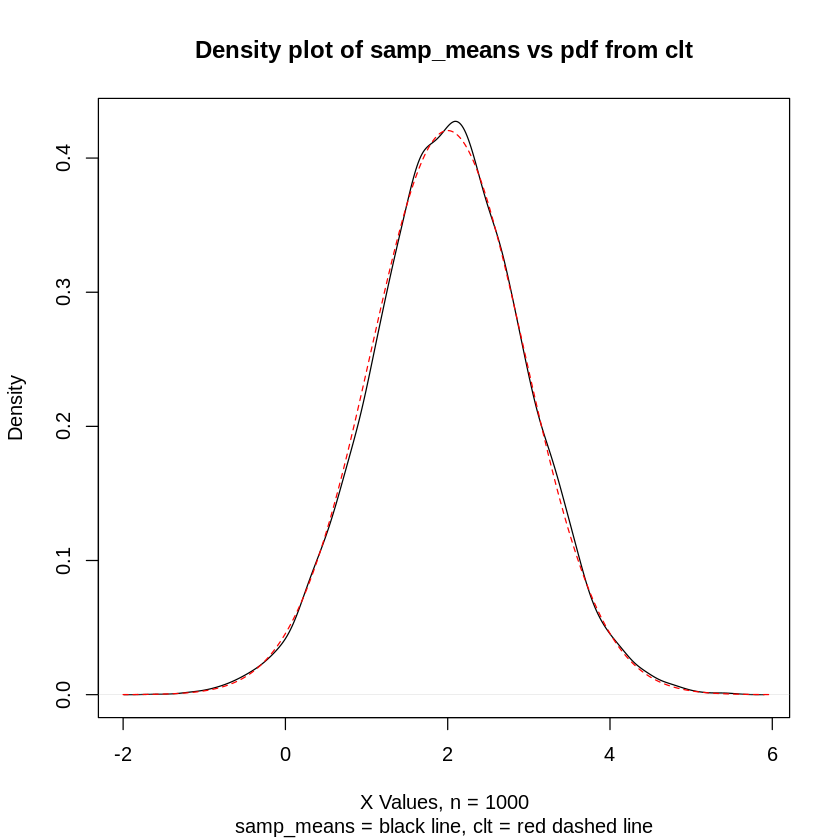

In [34]:
# solution to question

# Create the first density plot which is the plot from our samp_means using plot(density(samp_means)).
# The "main" argument is for title, the "sub" argument is for subtitle at the bottom and the "xlab" argument is for the x-axis label.
plot(density(samp_means), main = "Density plot of samp_means vs pdf from clt", sub = "samp_means = black line, clt = red dashed line",
     xlab = "X Values, n = 1000")

# Overlay the second density plot using lines and use clt (our data frame that contains the pdf calculation) as the data.
# Make sure the col = "red" and lty = "dashed" so this pdf creates a dashed red line density plot.
lines(clt, col = "red", lty = "dashed")

# <a name="Q10">Question 10</a>

---

Plot the probability density functions of the exponential distribution with a rate of $\lambda = 2$ between the values of $x=0$ and $x=5$. Plot the pdf as a solid black line and not as points.

*Hint: See the [Appendix: Exponential Distributions](#08append-exp) for more background on exponential distributions, the rate parameter, and the `dexp()` function.*


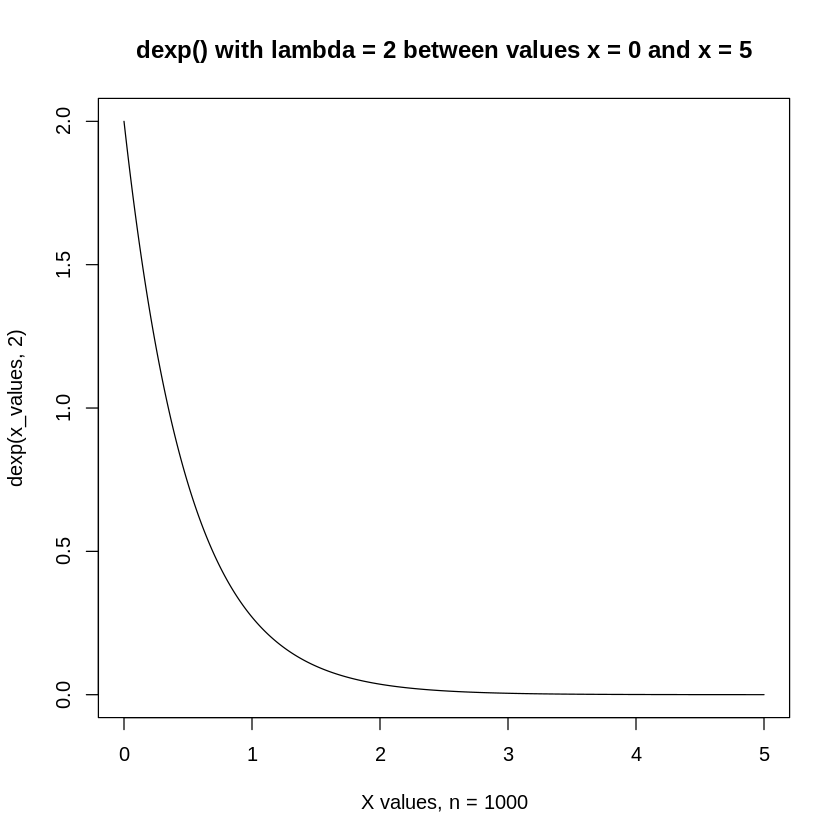

In [29]:
# solution to question

# Create a vector that has the sequence from 0 to 5 and have 1000 evenly spaced values and store it in x_values. (Will use this as x values for the plot and for exponential distribution calculation)
# The less length I use in the sequence, the less the plot looks like a curve. The plot would have more corners due to not enough length. Therefore, I'm using 1000 in length to
# plot the exponential distribution in a beautiful curved line.
x_values <- seq(0, 5, length = 1000)

# Plot the exponential distribution where the x value is x_values and the y value is the function for exponential distribution which is-
# dexp(x, rate) where rate is 2 and x is x_values. The type = "l" argument means I want the plot to be a line. (main and xlab are explained in the previous code)
plot(x_values, dexp(x_values, 2), type = "l", main = "dexp() with lambda = 2 between values x = 0 and x = 5", xlab = "X values, n = 1000")

# <a name="Q11">Question 11</a>

---

Use the `lapply` function to draw 10,000 *independent, identically distributed (or i.d.d)* samples each of size `5` from an exponential distribution with rate parameter $\lambda = 2$. We can draw a single sample using the `rexp` function. Assign the result the name `samples2`. **Do not print the samples**.

Then, use the `sapply` function to determine the sample mean of each sample of data in `samples2`. Assign the result the name `samp_means2`. **Do not print the sample mean of each sample of data**.

Finally, in a separate code cell, compute the mean and standard error of the values stored in sampling distribution `samp_means2` **and print only these two numbers.** Recall the standard error is the standard deviation of the sampling distribution.


In [35]:
# create samples2 and compute vector samp_means2

# I will omit the explanation on lapply because its the same as in question 5.

# Use lapply to do the same thing as in question 5, but inside the function I will be using rexp instead and store the result in samples2.
samples2 <- lapply(1:10000, FUN = function(x)
{
  exp_samp <- rexp(5, 2)  # rexp(5, 2) draws 1 sample of size 5 and store it in exp_samp.

  return (exp_samp)  # Return exp_samp.

})

In [36]:
# compute mean and standard error of sampling distribution

# Use sapply to apply the mean function over the list, samples2 and store it in samp_means2.
samp_means2 <- sapply(samples2, FUN = mean)

In [37]:
# Print out the message to see the mean and the standard error.
message("The mean of samp_means is ", mean(samp_means2), ".")
message("The standard error of samp_means is ", sd(samp_means2), ".")

The mean of samp_means is 0.497882647108886.

The standard error of samp_means is 0.226798543876264.



# <a name="Q12">Question 12</a>

---

In [Question 10](#Q10), we consider an exponentially distributed population with rate parameter $\lambda = 2$ that we denote $X \sim \text{Exp}(2)$. If the rate parameter is $\lambda = 2$, then the mean and standard deviation of population $X$ are $\mu = \frac{1}{\lambda} = 0.5$ and $\sigma = \frac{1}{\lambda} = 0.5$.

Use the Central Limit Theorem to give the values of the mean and standard error of the sampling distribution for the mean if samples size $n=5$ are random selected from an exponential population with rate parameter $\lambda = 2$.

<br>  

*Note: Although the sample size $n=5$ is small, we will apply CLT anyway and see how accurate the estimate is in the next question.*


## <a name="sol12">Solution to Question 12</a>

---

Using the CLT, if we randomly select samples size $n=5$ from a population with distribution $\text{Exp}(2)$, then we have:


- Mean of the sampling distribution will equal 0.5.
- Standard error of the sampling distribution will equal 0.2236. (give an exact answer or round to four decimal places).



<br>  
<br>  


# <a name="Q13">Question 13</a>

---

Create a single plot that contains the graphs of two density plots overlayed on top of each other.

1. One plot is a density plot of the sample means stored in the simulated sampling distribution `samp_means2`.
  - Sketch this curve with a black solid line.
2. The second plot is a density plot of the theoretical sampling distribution obtained using the CLT that you determined in [Question 12](#Q12).
  - Sketch this curve with a red, dashed line.
  - You should assume the theoretical sampling distribution is normally distributed.

In the text cell below your code and plot, explain what is similar/different about the plots. For example, do the plots have the same means? The same standard errors? The same shape? What are the similarities and differences between the simulated sampling distribution and the theoretical sampling distribution we obtained using CLT.


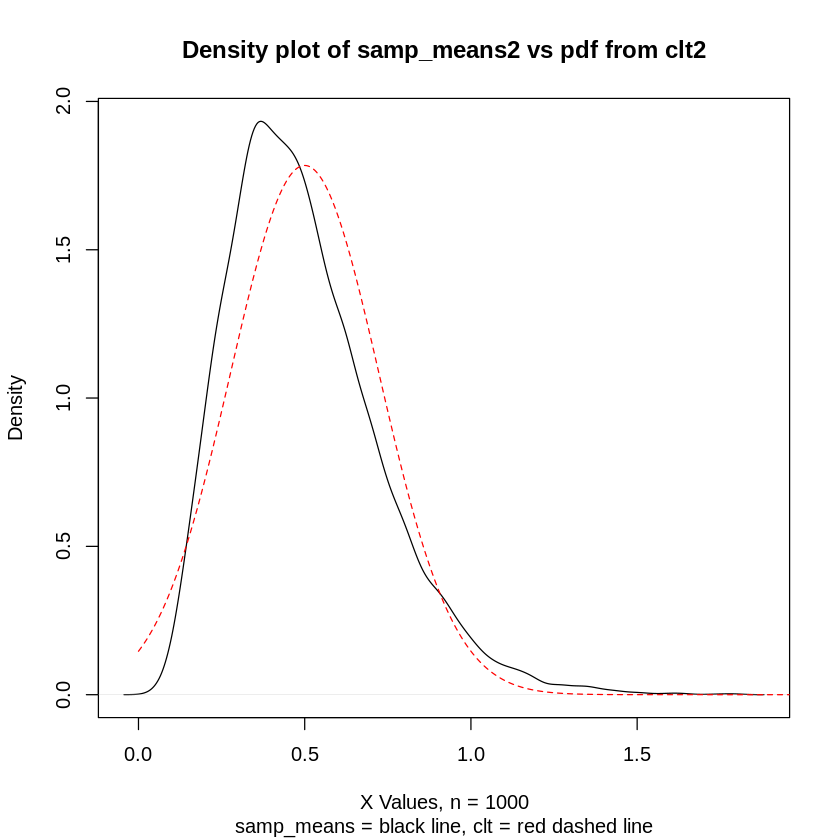

In [38]:
# solution to question

# Create another data frame that calculates the pdf using the mean and the standard error from question 12.
# The x column will store the 1000 evenly spaced sequence from 0 to 5 and the pdf column will calculate the pdf of each value in the sequence using the mean and standard error from question 12.
# Finally, store the data frame in clt2.
clt2 <- data.frame(x = seq(0, 5, length = 1000),
                  pdf = dnorm(seq(0, 5, length = 1000), 0.5, 0.2236))

# Plot the density plot of samp_means2.
plot(density(samp_means2), main = "Density plot of samp_means2 vs pdf from clt2", sub = "samp_means = black line, clt = red dashed line",
     xlab = "X Values, n = 1000")

# Overlay the plot from calculating the pdf, in clt2. (Make sure to use col = "red", and lty = "dashed" to have a red dashed line representing the pdf from clt2)
lines(clt2, col = "red", lty = "dashed")

## <a name="sol13">Solution to Question 13</a>

---

In the text cell below your code and plot, explain what is similar/different about the plots. Use complete sentences.

First, the shapes of both plots are generally similar. They both have semi-bell shape curve, I would be able to see more bell shape if the left end didn't end at 0. Second, the means of both plot seems very close to each other, they are not the same, but they are very close of having the same mean. Since the shape seems very similar, I believe the standard deviation of both plots are quite similar as well. Lastly, it seems like the right tail of both plots are aligning with each other. They seem to start approaching 0 (in y-axis) at almost the same point (near 1.5 in x-axis). However, there is a main difference. The main difference is that the plot from samp_means2 has a higher peak than the plot from obtained from using CLT. The samp_means2 has the peak of almost 2 in y-axis where the peak from the CLT distribution is more closer to 1.5 in y-axis.


<br>  
<br>  


# <a name="save2">Be Sure You Have Saved Your Work!</a>

---

This notebook is a shared Colab notebook available for anyone to view. However, since everyone is sharing this notebook, you do not have permission to save changes to this shared Colab notebook. In order to save your work:

1. You will need to set up a free Google Drive account. If you already have a Google Drive account, you are ready to go!
2. Click the `Copy to Drive` button to the right of the `+ Code` and `+ Text` buttons on top of the notebook.
3. Select from the menu `File/Save a Copy in Drive`.
  - By default, the notebook will be saved in a folder named **Colab Notebooks** in your Drive.
  - Feel free to rename and store the notebook wherever you like.


# <a name="08append">Appendix: Summary of Common Continuous Random Variables</a>

---



## <a name="08append-normal">Normal Distributions</a>

---

If $X$ is <font color="dodgerblue">**normally distributed**</font>
with mean $\mu$ and standard deviation $\sigma$, we write
$\color{dodgerblue}{X \sim N( \mu ,\sigma)}$. The formula for the
probability density is called the Gaussian and is given below.

$$f(x; \mu, \sigma) = \dfrac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2} \left( \frac{x-\mu}{\sigma} \right)^2}$$

-   The expected value is $E(X) = \mu$.
-   The variance is $\mbox{Var} (X) = \sigma^2$.
-   Use `dnorm(x, mu, sigma)` to calculate $f(x)$.
    -   <font color="tomato">Recall for continuous distributions,
        $f(x)$ gives the height of the pdf.</font>
    -   <font color="tomato">Probabilities are areas under $f(x)$
        (not the heights).</font>
    -   <font color="tomato">**DO NOT use `dnorm()` to compute
        probabilities.**</font>
-   <font color="mediumseagreen">**Be sure to use `pnorm(x, mu, sigma)` to calculate $P(X \leq x)$, the area to the left of $X=x$.**</font>
    -   <font color="mediumseagreen">**One last warning, be sure to use `pnorm()` to compute probabilities not `dnorm()`.**</font>
-   Use `rnorm(n, mu, sigma)` to generate a random sample of size $n$ from population $X \sim N(mu, sigma)$.
-   Use `qnorm(q, mu, sigma)` to find the q<sup>th</sup> percentile.
-   We have the **[68%-95%-99.5% Empirical Rule](#08empirical)**</font>.
-   We can standardize the normal distribution using **[z-scores](#08z-score)**:
    $$z = \frac{x - \mu}{\sigma}$$



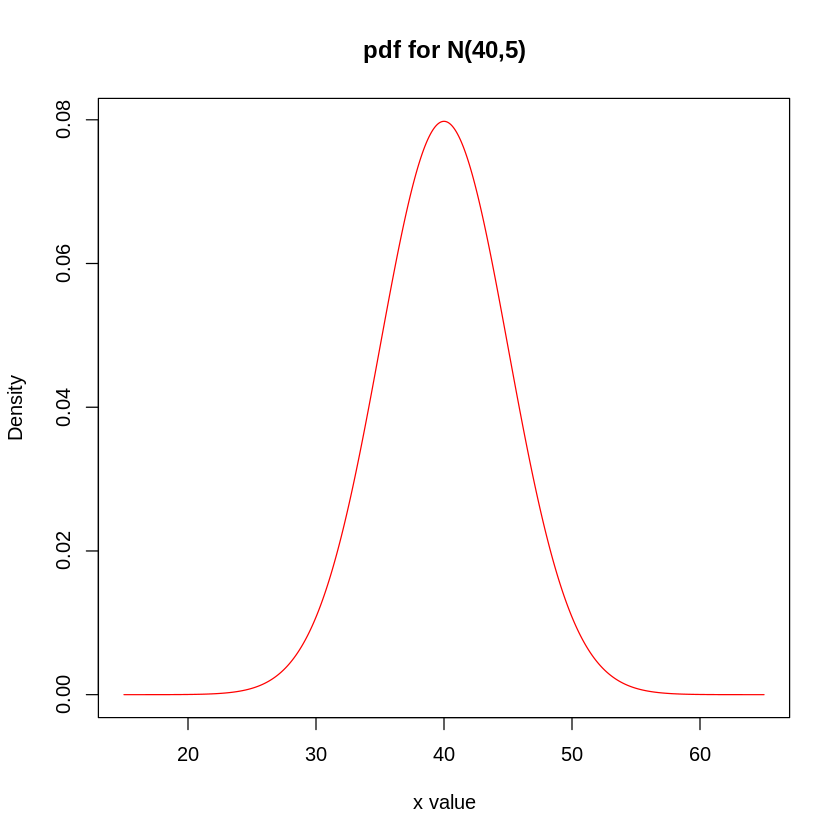

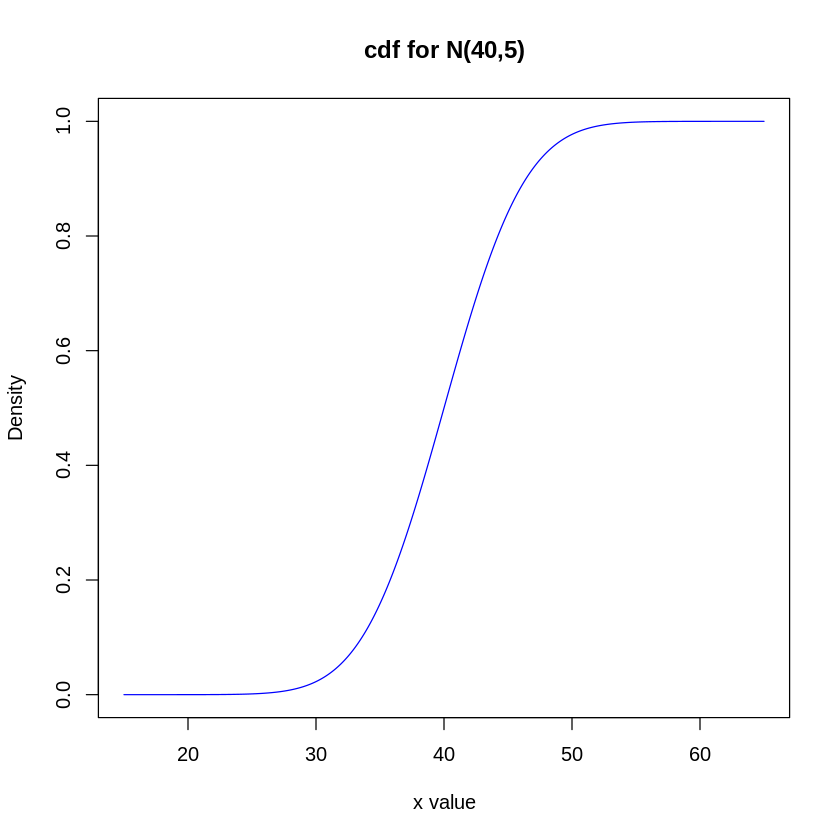

In [39]:
x <- seq(15, 65, length=1000)

plot(x, dnorm(x, 40, 5), type="l", col = "red", xlab="x value",
  ylab="Density", main="pdf for N(40,5)")

plot(x, pnorm(x, 40, 5), type="l", col = "blue", xlab="x value",
  ylab="Density", main="cdf for N(40,5)")

## <a name="08append-exp">Exponential Distributions</a>

---

Let $X$ be the amount of time between the successive events if we know
the average time between occurrences is $\mu$. The <font color="dodgerblue">**rate parameter**
$\lambda = \frac{1}{\mu}$</font> is the average number of times the
event occurs per unit of time. Then $X$ is <font color="dodgerblue">**exponentially distributed**</font> with rate
parameter $\lambda$, and we write
$\color{dodgerblue}{X \sim \mbox{Exp} (\lambda)}$.

The pdf for $X \sim \mbox{Exp} (\lambda)$ is the exponential function

$$f(x; \lambda) = \lambda e^{-\lambda x} \quad \mbox{for } x >0 .$$

-   The expected value is $E(X) = \dfrac{1}{\lambda} = \mu$
-   The variance is $\mbox{Var}(X) = \dfrac{1}{\lambda^2} = \mu^2$.
-   Use `dexp(x, lambda)` to find the height of the pdf function, which is $\lambda e^{-\lambda x}$.
    -   <font color="tomato">**DO NOT use `dexp()` to compute probabilities.**</font>
-   Use `pexp(x, lambda)` to calculate $P(X \leq x)=\int_0^x \lambda e^{-\lambda t} \, dt$.
    -   It never hurts to practice your integration and check with `pexp()`!
-   Use `rexp(n, lambda)` to generate a random sample of size $n$ from population $X \sim \mbox{Exp}(\lambda)$.
-   Use `qexp(q, lambda)` to find the q<sup>th</sup> percentile.



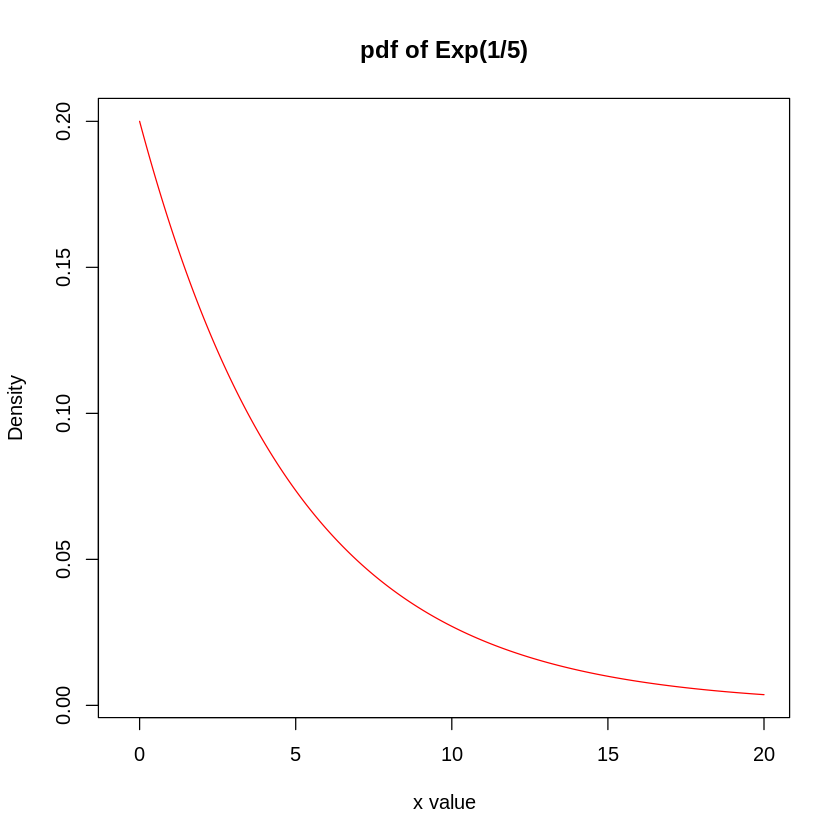

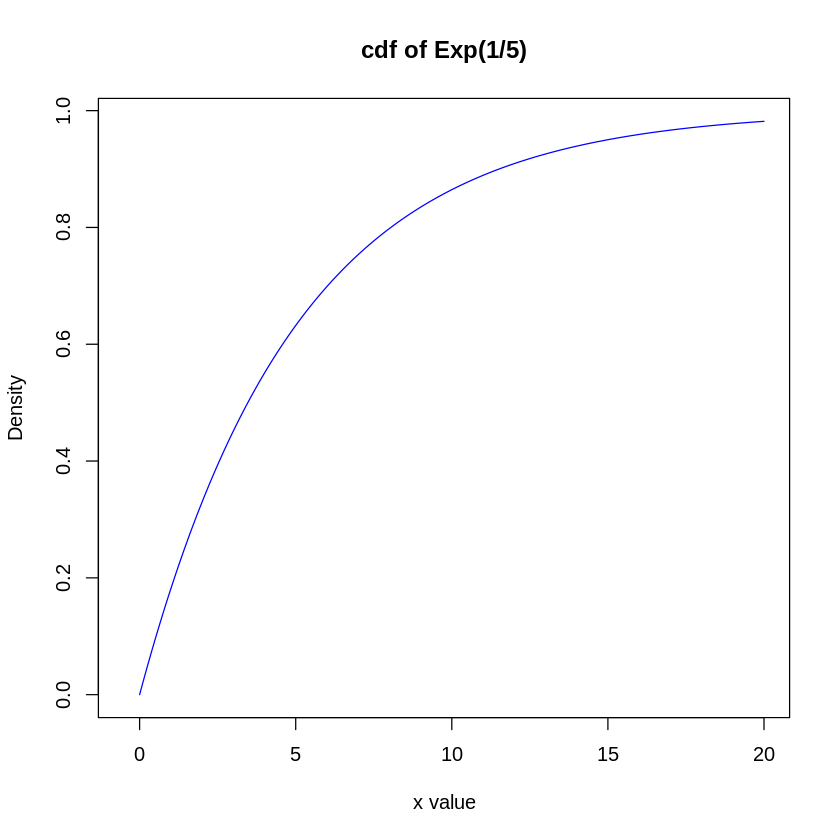

In [40]:
x <- seq(0, 20, length=1000)

plot(x, dexp(x, 1/5), type="l", col = "red", xlab="x value",
  ylab="Density", main="pdf of Exp(1/5)",
  xlim = c(-0.5, 20))

plot(x, pexp(x, 1/5), type="l", col = "blue", xlab="x value",
  ylab="Density", main="cdf of Exp(1/5)",
  xlim = c(-0.5, 20))